## Determine which age group and gender have the best average performance relative to the Boston Qualifying (BQ) Standards.

## Load Datasets

In [11]:
import pandas as pd 

#load athletes dataset
athletes = pd.read_csv('Athletes.csv', sep=',')

athletes.head()

,Bib,Zip,Age,Age Group,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039


In [12]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17220 entries, 0 to 17219
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bib             17220 non-null  int64  
 1   Zip             17220 non-null  int64  
 2   Age             17220 non-null  int64  
 3   Age Group       17220 non-null  object 
 4   Gender          17220 non-null  object 
 5   First Half      17220 non-null  int64  
 6   Second Half     17220 non-null  int64  
 7   Finish          17220 non-null  int64  
 8   Positive Split  17220 non-null  int64  
 9   Percent Change  17220 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB


In [5]:
#load BQStandards dataset
BQstandards = pd.read_csv('BQStandards.csv', sep=',')

BQstandards.head()

,Gender,Age Bracket,Standard
0,M,Under 35,10800
1,M,35-39,11100
2,M,40-44,11400
3,M,45-49,12000
4,M,50-54,12300


In [6]:
BQstandards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       22 non-null     object
 1   Age Bracket  22 non-null     object
 2   Standard     22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


## Preparing and Merging the data 

In [16]:
#rename Age Group column to Age Bracket 
athletes.rename(columns={'Age Group': 'Age Bracket'}, inplace= True)

In [17]:
#merge athletes and BQstandard dataset

merged_data = pd.merge(athletes, BQstandards, how='left', on=['Age Bracket', 'Gender'])

In [19]:
merged_data.head()

,Bib,Zip,Age,Age Bracket,Gender,First Half,Second Half,Finish,Positive Split,Percent Change,Standard
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664,10800
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657,10800
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389,11400
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013,11100
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039,10800


In [20]:
merged_data['time_difference'] = merged_data['Finish'] - merged_data['Standard']

merged_data.head()

,Bib,Zip,Age,Age Bracket,Gender,First Half,Second Half,Finish,Positive Split,Percent Change,Standard,time_difference
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664,10800,-3007
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657,10800,-2896
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389,11400,-3448
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013,11100,-3038
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039,10800,-2623


In [21]:
merged_data['time_diff_minutes'] = merged_data['time_difference'] / 60

merged_data.head()

,Bib,Zip,Age,Age Bracket,Gender,First Half,Second Half,Finish,Positive Split,Percent Change,Standard,time_difference,time_diff_minutes
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664,10800,-3007,-50.116667
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657,10800,-2896,-48.266667
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389,11400,-3448,-57.466667
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013,11100,-3038,-50.633333
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039,10800,-2623,-43.716667


## Analyzing Performance of Age Brackets and Gender 

In [31]:
#summary of data
avg_performance = merged_data.groupby(['Age Bracket', 'Gender'])['time_difference'].mean()

avg_performance

Age Bracket  Gender
35-39        F         1303.983591
             M         1661.853301
40-44        F         1279.463706
             M         1448.234738
45-49        F          847.107965
             M         1400.652286
50-54        F         1303.550914
             M         1486.022472
55-59        F         1199.335079
             M         1359.906810
60-64        F          917.437018
             M         1333.590395
65-69        F          901.516129
             M         1240.328467
70-74        F          400.341463
             M         1721.333333
75-79        F         2411.833333
             M         1787.696970
80 and Over  F         2071.000000
             M          513.142857
Under 35     F         1867.572880
             M         1791.071429
Name: time_difference, dtype: float64

## Visualize Data

In [33]:
avg_performance_df = avg_performance.reset_index()

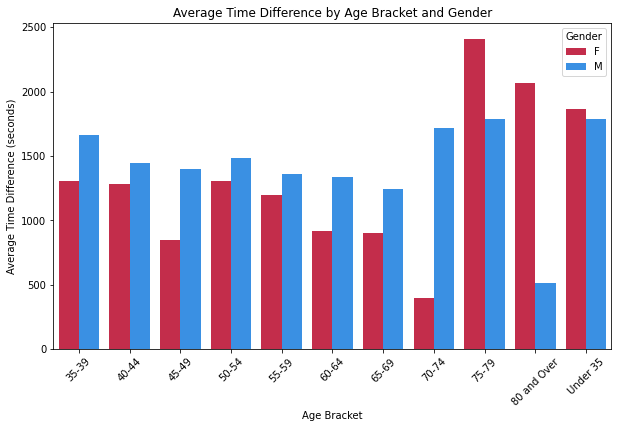

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = {'M': 'dodgerblue', 'F': 'crimson'}

plt.figure(figsize= [10,6])
sns.barplot(x='Age Bracket', y='time_difference', hue='Gender', data=avg_performance_df, palette= colors)
plt.title('Average Time Difference by Age Bracket and Gender')
plt.xlabel('Age Bracket')
plt.ylabel('Average Time Difference (seconds)')
plt.xticks(rotation=45)
plt.show()